<a href="https://colab.research.google.com/github/s-sasaki-gunma/KYOTSU_TEST/blob/main/Exam2020_Sample_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# コンピュータとプログラミング
> 　コンピュータを使って与えられた課題を解決するためには，その課題解決のために必要な情報処理の分析，そしてその情報処理をコンピュータに行わせるためのプログラムの作成が必要である。本問は，シフト暗号の解読という課題を例に，(i) 課題解決のために必要な情報と，それを得るために必要な処理の明確化，そして (ii) その処理を実現するプログラムの作成とその実行による課題解決，という一連の過程の中でプログラミングの基本となる考え方や技法を問う問題である。<br>
　シフト暗号は，ローマ皇帝シーザーも使っていたと言われている初歩的な暗号で，文字のシフト数がわかれば解読できる。問 1 では，暗号解読にはそのシフト数がわかればよい，という点を明確化させ，問 2 では（元の文が英文だと仮定したときに）シフト数は文字の出現頻度から推定できることから，各文字の出現頻度を計算するプログラムを作成し，その結果からシフト数を推定させ，問 3 で，その検証を行う復号プログラムを作成させている。問 2 の文字出現頻度の計算プログラムは，テキストデータマイニングの基本となる処理だが，一般にも多くの頻度分析プログラムに共通する計算手法である。（ [共通テスト「情報Ⅰ」試作問題](https://www.ipsj.or.jp/education/9faeag0000012a50-att/sanko2.pdf#page=16) ）<br><br>
※高等学校の授業で多様なプログラミング言語が利用される可能性があることから，問題中で使用するプログラミング言語は，公平性を鑑みて，大学入試センター独自の日本語表記の疑似言語としている。

---

## 問題文
　次の文章を読み，後の問い（問 1～3）に答えよ。 

　シーザー暗号に代表される古典的な暗号化の方法であるシフト暗号はアルファベットの文字を決まった文字数分シフトさせて（ずらして）置き換える極めて単純な暗号手段である。T さんとM さんは授業で先生が出した課題であるシフト暗号で暗号化した暗号文をいかに解読するかを考えることにした。

---

### **問 1**

　次の会話文を読み，空欄 [　アイ　] ～ [　キク　] に当てはまる数字をマークせよ。

> **課題** 　英文をシフト暗号で暗号化した以下の暗号文を解読しなさい。ただし，英文は全て小文字でアルファベット以外のスペースや数字，「'」「,」「.」「?」などは変換されていません。<br>（省略）････nonsmkdo k zybdsyx yp drkd psovn, kc k psxkv bocdsxq zvkmo pyb dryco gry robo qkfo drosb vsfoc drkd dro xkdsyx wsqrd vsfo. sd sc kvdyqodrob psddsxq kxn zbyzob drkd go cryevn ny drsc.led, sx k vkbqob coxco, go mkx xyd nonsmkdo - go mkx xyd myxcombkdo - go mkx xyd rkvvyg - drsc qbyexn. dro lbkfo wox, vsfsxq kxn nokn, gry cdbeqqvon robo, rkfo myxcombkdon sd, pkb klyfo yeb zyyb zygob dy knn yb nodbkmd. dro gybvn gsvv vsddvo xydo, xyb vyxq bowowlob grkd go cki robo, led sd mkx xofob pybqod grkd droi nsn robo. sd ････（省略）

$$ 図１ 先生が出した課題 $$

**M さん**：シフト暗号って，例えばアルファベットを５文字右にシフトした場合，文字「a」は文字「f」に，文字「x」はまず２文字シフトして右端に達した後一番左端に戻り３文字シフトした文字「c」に置き換わるやつだよね。暗号化された文字列の復号は，その逆，つまり左に5 文字シフトすればできるね。

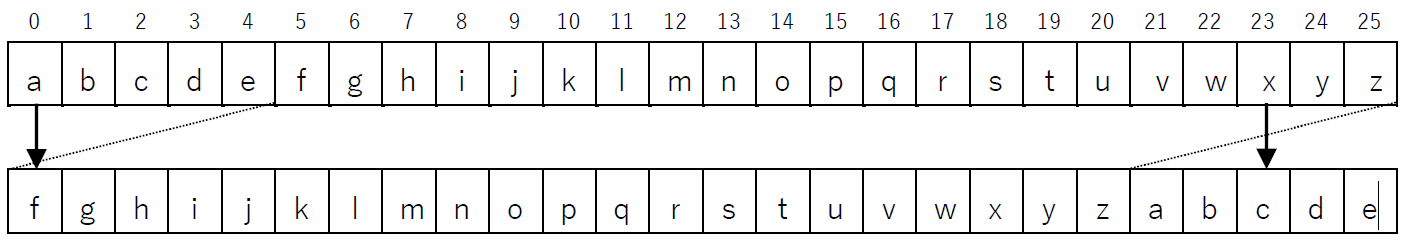 

$$ 図２　５文字右シフトした場合の考え方 $$

**T さん**：復号は必ずしも反対にシフトする必要はないよね。例えば９文字右にシフトされていた場合，復号するには９文字左にシフトでも良いけど，右に **[　アイ　]** 文字シフトすることもできるね。図２のようにアルファベットに0～25 の番号を割り当てて考えてみると，暗号化してx 番目の文字になった時，復号は x＋ **[　アイ　]** の値が **[　ウエ　]** 以下であれば x＋ **[　アイ　]** 番の文字に置き換わるけど， **[　ウエ　]** より大きい場合は， x＋ **[　アイ　]** － **[　オカ　]** 番の文字に置き換えれば復号できるよね。

**M さん**：暗号化で文字を何文字シフトしているか分かれば，この復号法で解読できるよね。どうやったら分かるかな。

**T さん**：すべての可能性，つまりシフトしない時を除いた **[　キク　]** 通りをプログラムで試せばいいんじゃない？

**M さん**：この場合だと **[　キク　]** 通りで済むけども，大文字があったり，日本語のように文字種の数が多い言語ではとても効率が悪い方法だよ。英文であれば，単語に含まれる「a」とか「e」が多い気がするし，逆に「z」が含まれる単語は少ししか思いつかない。アルファベットの出現頻度を調べればある程度推測できるんじゃないかな。インターネットで調べてみようよ。

**M さん**：どうやら一般的な英文のアルファベットの出現頻度には図３のような傾向があるみたいだよ。

**T さん**：文字によって出現頻度に特徴があるね。暗号化された英文のアルファベットの出現頻度を調べれば，何文字シフトされているか推測することができそうだね。一つ一つ数え上げるのは大変だから数え上げるプログラムを考えてみるよ。

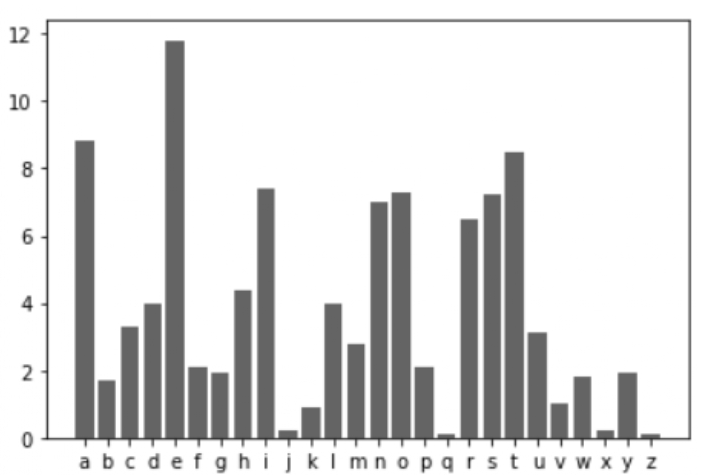

$$ 図３ 出現頻度のグラフ （縦軸％） $$

---

### **問 2**

　次の会話文を読み，空欄 **[　ケ　]** ・ **[　コ　]** に当てはまる内容を，後の解答群のうちから一つずつ選べ。また，空欄 **[　サシ　]** に当てはまる数字をマークせよ。

**T さん**：暗号化された英文のアルファベットの出現頻度を数え上げるプログラムを図５のように考えてみたよ。このプログラムでは，配列変数Angoubun に暗号文を入れて，一文字ずつアルファベットの出現頻度を数え上げて，その結果を配列変数Hindo に入れているんだ。Hindo[0]が「a」，Hindo[25]が「z」に対応しているよ。

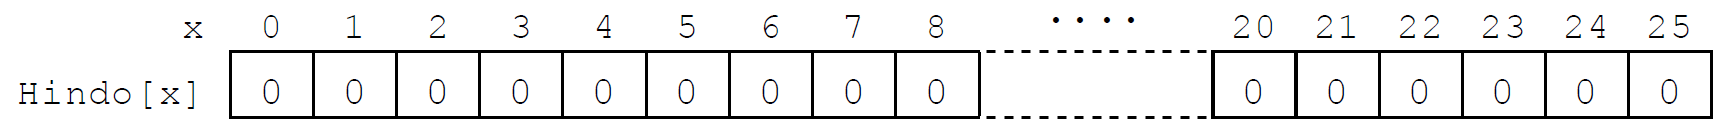 

$$ 図４ アルファベットの出現頻度を数え上げる配列 $$


```python
(01) Angoubun = ["p","y","e","b",…（省略）…"k","b","d","r","."]
(02) 配列Hindo のすべての要素に0 を代入する
(03) i を0 から 要素数(Angoubun)-1 まで1 ずつ増やしながら:
(04) ｜ bangou = 差分( 〘ケ〙 )
(05) ｜ もし bangou != －1 ならば:
(06) ⎿ ⎿ 〘コ〙 = 〘コ〙 + 1
(07) 表示する(Hindo)
```

$$ 図５ 出現頻度を求めるプログラム $$


【関数の説明】
> 要素数(値)…配列の要素数を返す。  
例：Data=["M","i","s","s","i","s","s","i","p","p","i"]の時、要素数(Data)は11 を返す。

> 差分(値)…アルファベットの「a」との位置の差分を返す。値がアルファベット以外の文字であれば －１ を返す。  
例：差分("e")は 4 を，差分("x")は 23 を返す。差分("5")や差分(",")は －1 を返す。

**M さん**：これでアルファベットの出現頻度が調べられるね。それで結果はどうなったの？

**T さん**：このプログラムで得られた配列Hindo をグラフ化してみたよ（図６）。

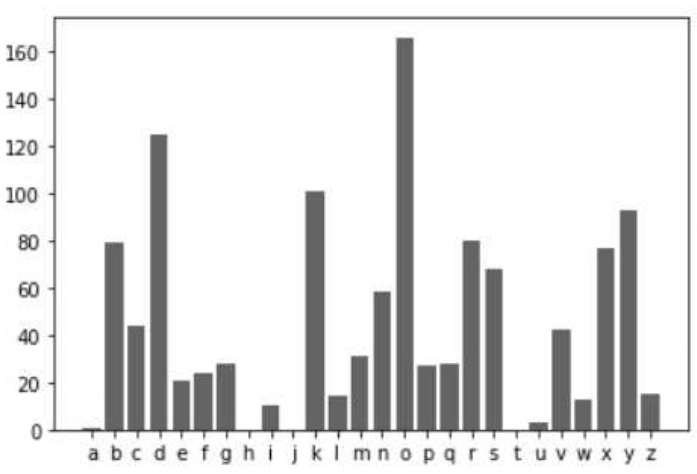

$$ 図６ アルファベットと配列Hindo のグラフ表示 $$

**M さん**：このアルファベットの出現頻度を見ると，「o」「d」「k」「y」が多いね。逆に出現頻度がない「a」「h」「j」「t」も手掛かりになるね。図３と照らし合わせると，この暗号化された文字列は右に **[　サシ　]** 文字シフトしていると考えられるね。

**T さん**：うん，でもそれが正しいか，実際にプログラムを作って復号してみようよ。

---

**[　ケ　]** ・ **[　コ　]** の解答群
0. $Angoubun[i]$
1. $Angoubun[i-1]$
2. $Angoubun[bangou]$
3. $Angoubun[bangou-1]$
4. $Hindo[bangou]$
5. $Hindo[bangou-1]$
6. $Hindo[i]$
7. $Hindo[i-1]$

---

### **問 3**

　次の会話文の空欄 **[　ス　]** ～ **[　チ　]** に当てはまる内容を，後の解答群のうちから一つずつ選べ。

**T さん**：暗号文を一文字ずつ復号して表示するプログラムができたよ（図７）。

**M さん**：なるほど，復号も右にシフトで考えているんだね。実行してみたら読み取れる英文になったの？

```python
(01) Angoubun = ["p","y","e","b",…（省略）…"k","b","d","r","."]
(02) 配列変数Hirabun を初期化する
(03) hukugousuu = 26 - 〘サシ〙
(04) i を0 から 要素数(Angoubun)-1 まで1 ずつ増やしながら:
(05) ｜ bangou = 差分( 〘ケ〙 )
(06) ｜ もし bangou != -1 ならば:
(07) ｜ ｜ もし ス <= 25 ならば:
(08) ｜ ｜ ｜ Hirabun[i] = 文字( 〘ス〙 )
(09) ｜ ｜ そうでなければ:
(10) ｜ ｜ ⎿ Hirabun[i] = 文字( 〘セ〙 )
(11) ｜ そうでなければ:
(12) ⎿ ⎿ Hirabun[i] = 〘ソ〙
(13) 表示する(Hirabun)
```

【関数の説明】
> 文字(値)…番号の値に対するアルファベットの文字を返す。値が0 以上25 以下でなければ「アルファベットでない」を返す。  
例：文字(4)は「e」を，文字(23)は「x」を返す。文字(-1)や文字(27)は「アルファベットでない」を返す。

**T さん**：うん，復号したらこんな英文が表示されたよ。正しい英単語に変換されているみたいだから推測は当たっていたね。

> four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in liberty, and dedicated to the proposition that all men are created equal.now we are engaged in a great civil war, testing whether that nation, or any nation ･････（省略） ･････ last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under god, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth.

**M さん**：これって有名なリンカーンのゲティスバーグ演説じゃない。ほら最後のところ有名なフレーズだよね。

**T さん**：先生，課題ができました。元の英文はリンカーンのゲティスバーグ演説ですね。プログラムで文字の出現頻度を調べて，シフトされた文字数を推測しました。復号はこのプログラムで変換してみました。

**先生**：よくできたね，素晴らしい！このプログラムはもっと簡単にできるね。この(07)～(10)の※部分は工夫すれば１行にまとめられるよ。ヒントは余りを求める算術演算子％を使うんだ。

**T さん**：えっ，１行ですか？・・・・・分かった！

```python
　Hirabun[i] = 文字( 〘タ〙 % 〘チ〙 )
```

とすればもっと簡潔にできたんだ。

**先生**：素晴らしい！

---

**[　ス　]** ～ **[　ソ　]** の解答群
0. $bangou+hukugousuu$
1. $bangou$
2. $hukugousuu$
3. $bangou+hukugousuu-26$
4. $bangou+hukugousuu-25$
5. $hukugousuu-26$
6. $Angoubun[i]$
7. $Hirabun[i]$
8. $Angoubun[i+hukugousuu]$

---

**[　タ　]** の解答群
0. $bangou+hukugousuu$
1. $(bangou+hukugousuu)$
2. $i+hukugousuu$
3. $(i+hukugousuu)$
4. $hukugousuu+26$
5. $(hukugousuu+26)$

---

**[　チ　]** の解答群
0. $25$
1. $26$
2. $bangou$
3. $hukugousuu$

---

# 本文中のプログラムのPython化
- 前処理を含め「ランタイム」から「すべてのセルを実行」して確認しましょう
- 問題文に即しているため、三項演算子やarray.append()のようなPython独自の構文やメソッドはできる限り用いていない

## 前処理

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def deff(x):
  n = int( ord(x) - ord("a") )
  return n if 0 <= n and n <= 25 else -1

def text(x):
  return chr( x + ord("a") )

def view(x):
  t = ""
  for i in x:
    t = t + i
  return t

src="pyeb cmybo kxn cofox iokbc kqy yeb pkdrobc lbyeqrd pybdr yx drsc myxdsxoxd, k xog xkdsyx, myxmosfon sx vslobdi, kxn nonsmkdon dy dro zbyzycsdsyx drkd kvv wox kbo mbokdon oaekv. xyg go kbo oxqkqon sx k qbokd msfsv gkb, docdsxq grodrob drkd xkdsyx, yb kxi xkdsyx cy myxmosfon kxn cy nonsmkdon, mkx vyxq oxnebo. go kbo wod yx k qbokd lkddvo-psovn yp drkd gkb. go rkfo mywo dy nonsmkdo k zybdsyx yp drkd psovn, kc k psxkv bocdsxq zvkmo pyb dryco gry robo qkfo drosb vsfoc drkd dro xkdsyx wsqrd vsfo. sd sc kvdyqodrob psddsxq kxn zbyzob drkd go cryevn ny drsc. led, sx k vkbqob coxco, go mkx xyd nonsmkdo - go mkx xyd myxcombkdo - go mkx xyd rkvvyg - drsc qbyexn. dro lbkfo wox, vsfsxq kxn nokn, gry cdbeqqvon robo, rkfo myxcombkdon sd, pkb klyfo yeb zyyb zygob dy knn yb nodbkmd. dro gybvn gsvv vsddvo xydo, xyb vyxq bowowlob grkd go cki robo, led sd mkx xofob pybqod grkd droi nsn robo. sd sc pyb ec dro vsfsxq, bkdrob, dy lo nonsmkdon robo dy dro expsxscron gybu grsmr droi gry pyeqrd robo rkfo drec pkb cy xylvi knfkxmon. sd sc bkdrob pyb ec dy lo robo nonsmkdon dy dro qbokd dkcu bowksxsxq lopybo ec - drkd pbyw droco ryxybon nokn go dkuo sxmbokcon nofydsyx dy drkd mkeco pyb grsmr droi qkfo dro vkcd pevv wokcebo yp nofydsyx - drkd go robo rsqrvi bocyvfo drkd droco nokn crkvv xyd rkfo nson sx fksx - drkd drsc xkdsyx, exnob qyn, crkvv rkfo k xog lsbdr yp pboonyw - kxn drkd qyfobxwoxd yp dro zoyzvo, li dro zoyzvo, pyb dro zoyzvo, crkvv xyd zobscr pbyw dro okbdr."
Alphabet=["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

Angoubun = []
for i in src:
  Angoubun.append(i)

## 出現頻度を求めるPythonプログラム

[1, 79, 44, 125, 21, 24, 28, 0, 10, 0, 101, 14, 31, 58, 166, 27, 28, 80, 68, 0, 3, 42, 13, 77, 93, 15]


<BarContainer object of 26 artists>

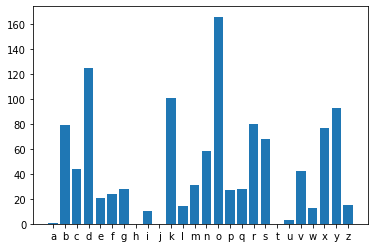

In [ ]:
Hindo = [0]*26
for i in range(len(Angoubun)) :
  bangou = deff(Angoubun[i])
  if bangou != -1 :
    Hindo[bangou] = Hindo[bangou] + 1
print(Hindo)
plt.bar( Alphabet, Hindo )

## 暗号文を復号するPythonプログラム

In [ ]:
Hirabun = [""] * len(Angoubun)
hukugousuu = 26 - 10
for i in range(len(Angoubun)) :
  bangou = deff(Angoubun[i])
  if bangou != -1 :
    if bangou + hukugousuu <= 25 :
      Hirabun[i] = text( bangou + hukugousuu )
    else :
      Hirabun[i] = text( bangou + hukugousuu - 26 )
  else :
    Hirabun[i] = Angoubun[i]
view(Hirabun)

'four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in liberty, and dedicated to the proposition that all men are created equal. now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. we are met on a great battle-field of that war. we have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that the nation might live. it is altogether fitting and proper that we should do this. but, in a larger sense, we can not dedicate - we can not consecrate - we can not hallow - this ground. the brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. the world will little note, nor long remember what we say here, but it can never forget what they did here. it is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus f

## 暗号文を復号するPythonプログラム（剰余算を使った改良版）

In [ ]:
Hirabun = [""] * len(Angoubun)
hukugousuu = 26 - 10
for i in range(len(Angoubun)) :
  bangou = deff(Angoubun[i])
  if bangou != -1 :
    Hirabun[i] = text( (bangou + hukugousuu) % 26 )
  else :
    Hirabun[i] = Angoubun[i]
view(Hirabun)

'four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in liberty, and dedicated to the proposition that all men are created equal. now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. we are met on a great battle-field of that war. we have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that the nation might live. it is altogether fitting and proper that we should do this. but, in a larger sense, we can not dedicate - we can not consecrate - we can not hallow - this ground. the brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. the world will little note, nor long remember what we say here, but it can never forget what they did here. it is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus f